<span style="font-family: Arial; font-weight:bold;font-size:2em;color:black">Exploratory Data Analysis – Mini Project

https://www.kaggle.com/karangadiya/fifa19

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03a1fc"> Importing the Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03a1fc">Reading the data

In [4]:
fifa = pd.read_csv('fifa.csv')
fifa

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,

In [5]:
fifa.shape
# Checking the shape

(18207, 89)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03a1fc">Dropping unnecessary columns

In [6]:
fifa.drop(['ID','Photo','Flag','Club Logo','Jersey Number','Loaned From','Club','Work Rate'],axis=1,inplace=True)
# ID, Jersey number & Photo were dropped as they're irrelevant for analysis
# Flag was dropped as nationality is already mentioned 
# Club logo and club due  to irrelevance
# Loaned From dropped due to irrelevance to the analysis
# Work Rate

In [7]:
fifa.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Body Type',
       'Real Face', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Cl

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03a1fc">Conversion of columns

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#fc7b03">1. Value

In [8]:
fifa['Value']
# Amount with Euro symbol as prefix.
# Suffix ‘K’ indicating thousands.
# Suffix 'M' indicating millions.

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 18207, dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Checking the dtype

In [9]:
fifa.Value.dtypes
# Checking the dtype for deciding the type of operation to run for updating and further converting into float

dtype('O')

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Checking the null values

In [10]:
fifa.Value.isnull().sum()
# Checking for null values

0

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Updating the values

In [11]:
# Updating the values
for i in fifa[fifa['Value'].isnull()==False].index:
    if fifa.loc[i,'Value'][0] == '€':
        fifa.loc[i,'Value'] = fifa.loc[i,'Value'][1:]
    if fifa.loc[i,'Value'][-1] == 'M':
        fifa.loc[i,'Value'] = float(fifa.loc[i,'Value'][:-1])*1000000
    elif fifa.loc[i,'Value'][-1] == 'K':
        fifa.loc[i,'Value'] = float(fifa.loc[i,'Value'][:-1])*1000

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Converting to float

In [12]:
fifa.Value = fifa.Value.astype(float)
# converting into float

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#fc7b03">2. Wage

In [13]:
fifa['Wage']
# Amount with Euro symbol as prefix.
# Suffix ‘K’ indicating thousands.
# Suffix ‘M’ indicating millions.

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Checking the dtype

In [14]:
fifa.Wage.dtype
# Checking the dtype for deciding the type of operation to run for updating and further converting into float

dtype('O')

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Checking the null values

In [15]:
fifa.Wage.isnull().sum()
# Checking for null values

0

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Updating the values

In [16]:
# Updating the values
for i in fifa[fifa['Wage'].isnull()==False].index:
    if fifa.loc[i,'Wage'][0] == '€':
        fifa.loc[i,'Wage'] = fifa.loc[i,'Wage'][1:]
    if fifa.loc[i,'Wage'][-1] == 'M':
        fifa.loc[i,'Wage'] = float(fifa.loc[i,'Wage'][:-1])*1000000
    elif fifa.loc[i,'Wage'][-1] == 'K':
        fifa.loc[i,'Wage'] = float(fifa.loc[i,'Wage'][:-1])*1000

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Converting to float

In [17]:
fifa.Wage = fifa.Wage.astype(float)

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#fc7b03">3. Joined

In [18]:
fifa['Joined']
# Year as a string, in some cases complete date as string

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18207, dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Checking the dtype

In [19]:
fifa.Joined.dtype

dtype('O')

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Checking for null values

In [20]:
fifa['Joined'].isnull().sum()

1553

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Updating the values

In [21]:
for i in fifa[fifa.Joined.isnull()==False].index:
    
    fifa.loc[i,'Joined'] = int(fifa.loc[i,'Joined'][-4::])

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Filling the null values

In [22]:
fifa.Joined.median()

2017.0

In [23]:
fifa.Joined.mean()

2016.4598294703976

In [24]:
fifa.Joined.mode()

0    2018
dtype: object

In [25]:
# Filling NaN values
fifa['Joined'].fillna(fifa.Joined.median(),inplace=True)

In [26]:
fifa.Joined.isnull().any()

False

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Converting to int

In [27]:
fifa.Joined = fifa.Joined.astype(int)
# Changing type as integer

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#fc7b03">4. Contract Valid Until

In [28]:
fifa['Contract Valid Until']
# Date as a string

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 18207, dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Checking the dtype

In [29]:
fifa['Contract Valid Until'].dtype

dtype('O')

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Checking for null values

In [30]:
fifa['Contract Valid Until'].isnull().sum()
# checking for null values

289

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Converting to datetime

In [31]:
fifa['Contract Valid Until'] = pd.to_datetime(fifa['Contract Valid Until'])
# Changing dtype to datetime

In [32]:
# for i in fifa[fifa['Contract Valid Until'].isnull()==False].index:
    
#     fifa.loc[i,'Contract Valid Until'] = int(fifa.loc[i,'Contract Valid Until'][-4::])
    
# # converting to integer with only year

In [33]:
fifa['Contract Valid Until'].dtype

dtype('<M8[ns]')

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Filling the null values

In [34]:
fifa['Contract Valid Until'].mean()

Timestamp('2020-03-08 03:08:17.868120064')

In [35]:
# filling null values
fifa['Contract Valid Until'].fillna(fifa['Contract Valid Until'].mean(),inplace=True)

In [36]:
fifa['Contract Valid Until'].isnull().any()

False

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#fc7b03">5. Height

In [37]:
fifa['Height']
# In inches with a quotation mark

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Checking dtype

In [38]:
fifa['Height'].dtype

dtype('O')

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Checking for null values

In [39]:
fifa['Height'].isnull().sum()

48

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Updating the values

In [40]:
for i in fifa[fifa['Height'].isnull()==False].index:
    
    fifa.loc[i,'Height'] = float(fifa.loc[i,'Height'][0]) + float(fifa.loc[i,'Height'][2:])/12

In [41]:
fifa['Height'].mean()

5.94677111441519

In [42]:
fifa['Height'].median()

5.916666666666667

In [43]:
fifa['Height'].fillna(fifa['Height'].mean(),inplace=True)

In [44]:
fifa.Height.dtype

dtype('float64')

In [45]:
fifa['Height'].isnull().any()

False

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#fc7b03">6. Weight

In [46]:
fifa['Weight']
# Contains the suffix lbs

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [47]:
fifa.Weight.dtype

dtype('O')

In [48]:
fifa.Weight.isnull().sum()

48

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Updating the values

In [49]:
for i in fifa[fifa.Weight.isnull()==False].index:
    
    fifa.loc[i,'Weight'] = int(fifa.loc[i,'Weight'][:-3])

In [50]:
fifa['Weight'].mean()

165.97912880665234

In [51]:
fifa['Weight'].median()

165.0

In [52]:
fifa.Weight.fillna(fifa.Weight.median(),inplace=True)

In [53]:
fifa.Weight.dtype

dtype('float64')

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#fc7b03">7. Release Clause

In [54]:
fifa['Release Clause']

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
          ...   
18202      €143K
18203      €113K
18204      €165K
18205      €143K
18206      €165K
Name: Release Clause, Length: 18207, dtype: object

In [55]:
fifa['Release Clause'].dtype

dtype('O')

In [56]:
fifa['Release Clause'].isnull().sum()

1564

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Updating the values

In [57]:
# Updating the values
for i in fifa[fifa['Release Clause'].isnull()==False].index:
    if fifa.loc[i,'Release Clause'][0] == '€':
        fifa.loc[i,'Release Clause'] = fifa.loc[i,'Release Clause'][1:]
    if fifa.loc[i,'Release Clause'][-1] == 'M':
        fifa.loc[i,'Release Clause'] = float(fifa.loc[i,'Release Clause'][:-1])*1000000
    elif fifa.loc[i,'Release Clause'][-1] == 'K':
        fifa.loc[i,'Release Clause'] = float(fifa.loc[i,'Release Clause'][:-1])*1000

In [58]:
fifa['Release Clause'].mean()

4585060.986600974

In [59]:
fifa['Release Clause'].median()

1100000.0

In [60]:
fifa['Release Clause'].fillna(fifa['Release Clause'].mean(),inplace=True)

In [61]:
fifa['Release Clause'].dtype

dtype('float64')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03a1fc">The null values

In [62]:
fifa.isnull().sum()

Unnamed: 0         0
Name               0
Age                0
Nationality        0
Overall            0
                  ..
GKHandling        48
GKKicking         48
GKPositioning     48
GKReflexes        48
Release Clause     0
Length: 81, dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#fc7b03">Filling the null values

In [63]:
for column_name in ['International Reputation', 'Weak Foot',
       'Skill Moves', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']:
    if fifa[column_name].isnull().any()==True:
        fifa[column_name].fillna(fifa[column_name].median(),inplace=True)

In [64]:
fifa['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

In [65]:
fifa['Preferred Foot'].fillna('Right',inplace=True)

In [66]:
fifa['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
C. Ronaldo                 1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Messi                      1
Courtois                   1
Neymar                     1
Shaqiri                    1
Name: Body Type, dtype: int64

In [67]:
fifa['Body Type'].fillna('Normal',inplace=True)

In [68]:
fifa['Position'].mode()

0    ST
dtype: object

In [69]:
fifa['Position'].fillna('ST',inplace=True)

In [70]:
fifa.isnull().sum()

Unnamed: 0        0
Name              0
Age               0
Nationality       0
Overall           0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 81, dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#03a1fc">Exploratory Analysis

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#fc7b03">1.	Plot the distribution of Overall rating for all players.

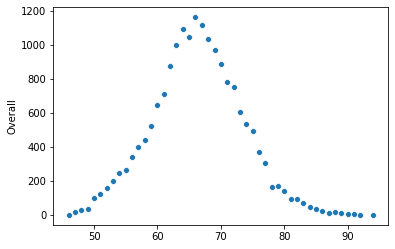

In [71]:
sns.scatterplot(fifa.Overall.value_counts().index,fifa.Overall.value_counts())

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#fc7b03">2.	Generate pair plots for the following variables:
    
    1. Overall
    2. Value
    3. Wage
    4. International Reputation
    5. Height
    6. Weight
    7. Release Clause

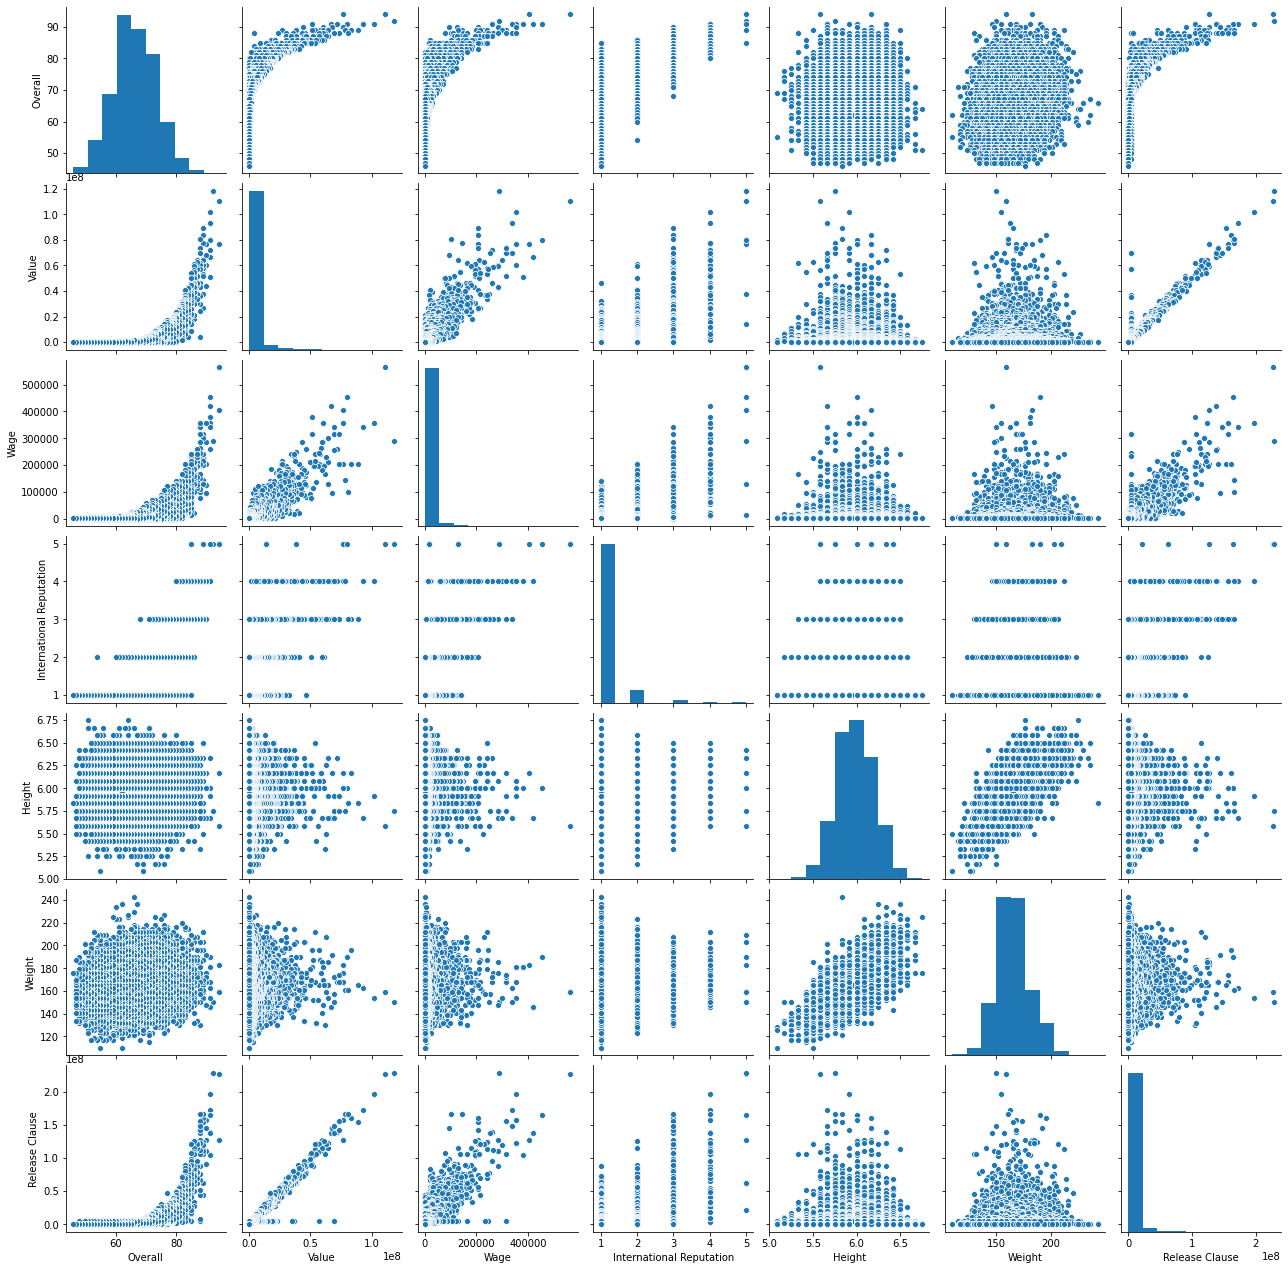

In [72]:
sns.pairplot(fifa[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']])

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#fc7b03">3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
 
    a)	What would the average wage for this set of players be?
    b)	What is the average age?
    c)	Is there a correlation between the Overall rating and Value for these players?


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Generating the Table

In [73]:
fifa[
    fifa['Contract Valid Until'] > pd.to_datetime('2020')
].sort_values(
    by='Overall',axis=0,ascending=False
)[[
    'Name','Age','Overall','Value','Wage','Contract Valid Until'
]].head(20)

,Name,Age,Overall,Value,Wage,Contract Valid Until
0,L. Messi,31,94,110500000.0,565000.0,2021-01-01
1,Cristiano Ronaldo,33,94,77000000.0,405000.0,2022-01-01
2,Neymar Jr,26,92,118500000.0,290000.0,2022-01-01
4,K. De Bruyne,27,91,102000000.0,355000.0,2023-01-01
7,L. Suárez,31,91,80000000.0,455000.0,2021-01-01
9,J. Oblak,25,90,68000000.0,94000.0,2021-01-01
10,R. Lewandowski,29,90,77000000.0,205000.0,2021-01-01
11,T. Kroos,28,90,76500000.0,355000.0,2022-01-01
19,T. Courtois,26,89,53500000.0,240000.0,2024-01-01
23,S. Agüero,30,89,64500000.0,300000.0,2021-01-01


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Average Wage

In [74]:
# Average wage
fifa[
    fifa['Contract Valid Until'] >= pd.to_datetime('2020')
].sort_values(
    by='Overall',axis=0,ascending=False
)[[
    'Wage'
]].head(20).mean()

Wage    302450.0
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Average Age

In [75]:
# Average age
fifa[
    fifa['Contract Valid Until'] >= pd.to_datetime('2020')
].sort_values(
    by='Overall',axis=0,ascending=False
)[[
    'Age'
]].head(20).mean()

Age    29.35
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Correlation between overall and value

In [76]:
# Correlation between overall and values
fifa[
    fifa['Contract Valid Until'] > pd.to_datetime('2020')
].sort_values(
    by='Overall',axis=0,ascending=False
)[[
    'Overall','Value'
]].head(20).corr()

,Overall,Value
Overall,1.00000,0.71582
Value,0.71582,1.00000


##### Observation: There is an overall positive strong correlation between Overall and Value

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#fc7b03">4.	Generate tables containing the top 5 players by Overall rating for each unique position.

    a)	Are there any players appearing in more than one Table. Please point out such players.
    b)	What is the average wage one can expect to pay for the top 5 in every position?


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Generating the tables

In [77]:
# Generating tables containing the top 5 players

for item in fifa['Position'].unique():
    print('The top 5 players for position',item,'are:')
    print(
        fifa[
            fifa['Position']==item                          # masking individual position
            ].sort_values(
                by='Overall',axis=0,ascending=False         # sorting the values by overall score in the descending order
                         )
        [['Name','Age','Overall','Value','Wage','Position'
         ]].head(5)                                         # printing the top 5 only
         )
    print()

The top 5 players for position RF are:
             Name  Age  Overall        Value      Wage Position
0        L. Messi   31       94  110500000.0  565000.0       RF
50     D. Mertens   31       87   45000000.0  135000.0       RF
528     D. Valeri   32       80   11500000.0   12000.0       RF
890   L. Podolski   33       78    6500000.0   11000.0       RF
1774     C. Ciano   28       75    6500000.0   17000.0       RF

The top 5 players for position ST are:
                 Name  Age  Overall       Value      Wage Position
1   Cristiano Ronaldo   33       94  77000000.0  405000.0       ST
10     R. Lewandowski   29       90  77000000.0  205000.0       ST
16            H. Kane   24       89  83500000.0  205000.0       ST
23          S. Agüero   30       89  64500000.0  300000.0       ST
36            G. Bale   28       88  60000000.0  355000.0       ST

The top 5 players for position LW are:
          Name  Age  Overall        Value      Wage Position
2    Neymar Jr   26       92  1185

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Checking for player repetition across tables

In [78]:
position = {}                                         # Creating an emty dictionary for storage
for item in fifa['Position'].unique():
    
    
    position[item] = list(fifa                        # storing the column 'Name' for each postion as a list under the position name as the key
                    [fifa['Position']==item
                    ].sort_values(by='Overall',
                                      axis=0,
                                      ascending=False
                                 )['Name'
                                  ].head(5))
    
position
         

{'CAM': ['A. Griezmann',
  'C. Eriksen',
  'Roberto Firmino',
  'T. Müller',
  'M. Özil'],
 'CB': ['D. Godín', 'S. Umtiti', 'M. Benatia', 'N. Otamendi', 'Naldo'],
 'CDM': ['Sergio Busquets', 'Casemiro', 'M. Pjanić', 'Fernandinho', 'Fabinho'],
 'CF': ['Luis Alberto', 'S. Giovinco', 'A. Milik', 'L. Stindl', 'Raffael'],
 'CM': ['Thiago',
  'S. Milinković-Savić',
  'Jorginho',
  'I. Gündoğan',
  'N. Keïta'],
 'GK': ['De Gea', 'J. Oblak', 'M. ter Stegen', 'T. Courtois', 'M. Neuer'],
 'LAM': ['J. Rodríguez',
  'D. Tadić',
  'Fabrio Farinha',
  'Leo Caldeirinha',
  'Nicolás Formido'],
 'LB': ['Marcelo', 'Jordi Alba', 'Alex Sandro', 'D. Alaba', 'Filipe Luís'],
 'LCB': ['G. Chiellini',
  'M. Hummels',
  'K. Koulibaly',
  'J. Vertonghen',
  'V. van Dijk'],
 'LCM': ['T. Kroos',
  'David Silva',
  'M. Hamšík',
  'M. Verratti',
  'Bruno Fernandes'],
 'LDM': ['N. Kanté', 'Paulinho', 'Marquinhos', 'Lucas Leiva', 'F. de Jong'],
 'LF': ['E. Hazard', 'P. Dybala', 'Iniesta', 'Jonathan Viera', 'S. Blanco'

In [79]:
a = list(fifa['Position'].unique())      # list of all the unique values in position
b = list(fifa['Position'].unique())      # list of all the unique values in position
for key1 in a:
    b.remove(key1)                       # removing the value of a from b so that the same keys(position[key]) are not compared
    for key2 in b:
        for item1 in position[key1]:
            for item2 in position[key2]:
                if item1==item2:         # checking for same values
                    print(item1)
    

##### Observation: No player seems to be appearing in more than one table

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#4e9968">Average wage expectation for each position

In [80]:
# Average wage expectation

for item in fifa['Position'].unique():                     # looking for unique postion values
    
    the_wage = fifa[
        fifa['Position']==item
    ].sort_values(by='Overall',
                  axis=0,
                  ascending=False)['Wage'].head(5).mean()  # finding the mean for each postion
    
    print('The Average Wage expectation for the top 5 players in  position',item,'is',the_wage)     
    
    print()

The Average Wage expectation for the top 5 players in  position RF is 148000.0

The Average Wage expectation for the top 5 players in  position ST is 294000.0

The Average Wage expectation for the top 5 players in  position LW is 261000.0

The Average Wage expectation for the top 5 players in  position GK is 192800.0

The Average Wage expectation for the top 5 players in  position RCM is 240800.0

The Average Wage expectation for the top 5 players in  position LF is 121200.0

The Average Wage expectation for the top 5 players in  position RS is 132200.0

The Average Wage expectation for the top 5 players in  position RCB is 231000.0

The Average Wage expectation for the top 5 players in  position LCM is 184400.0

The Average Wage expectation for the top 5 players in  position CB is 139600.0

The Average Wage expectation for the top 5 players in  position LDM is 126600.0

The Average Wage expectation for the top 5 players in  position CAM is 174000.0

The Average Wage expectation for th